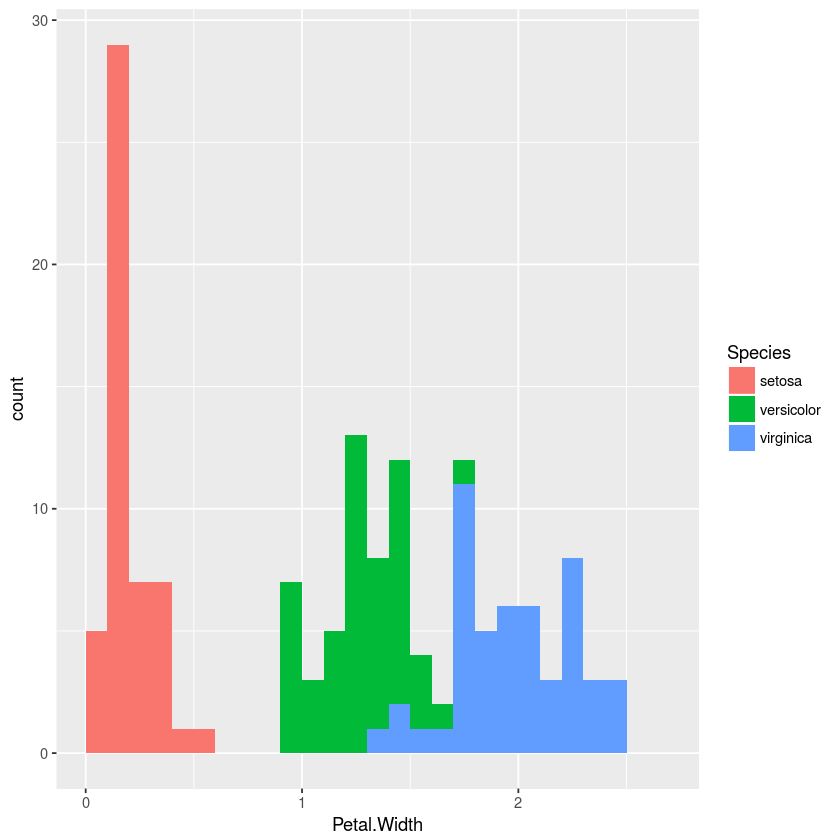

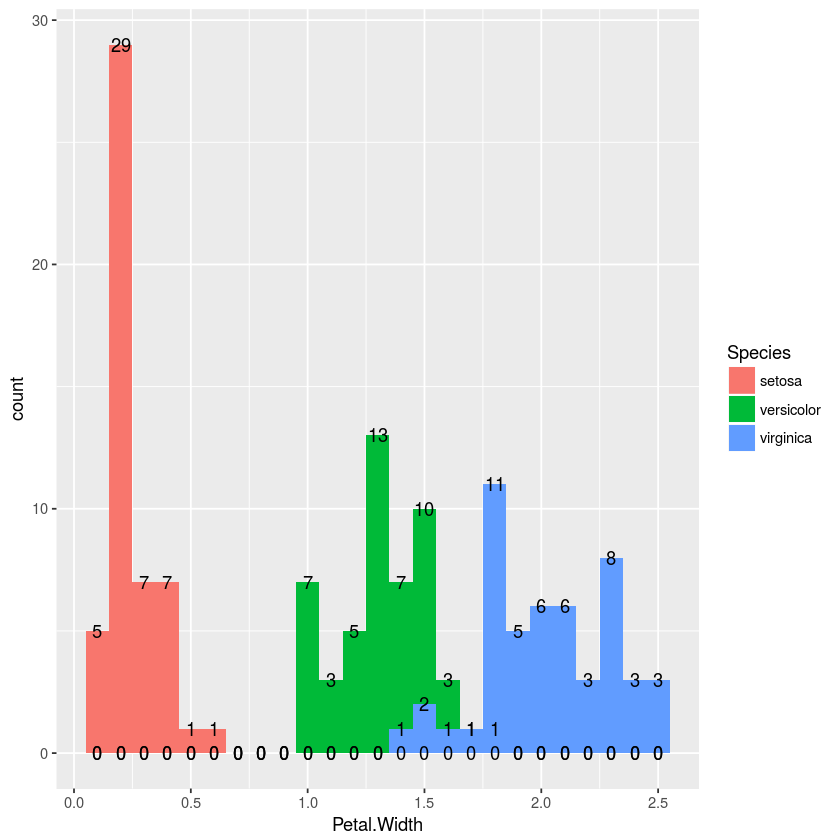

In [1]:
# Replicaremos los gráficos para los datos iris

# Estructura de ggplot
# ggplot(data, aes()) + geom()
# data objeto que contiene los datos
# aes: mapeo estético, como las variables son asociadas a las propiedades de la gráfica
# geom: Objetos geométricos tales como puntos, líneas, barras

library(ggplot2)

# Histogramas en ggplot2

# pasamos iris como data
# en aes usamos Petal.Width como x, estamos haciendo un histograma (univariado)
# indicamos que para el color de relleno use Species
# geom_histogram: indicamos los breaks (bines)
ggplot(iris, aes(x=Petal.Width, fill=Species)) + geom_histogram(breaks=seq(0,2.75,by=0.1))

# Histograma con etiquetas
# Por defecto el histrograma anterior apila (stacked) los grupos (Species)
# Vamos a usar position="identity" para evitar el apilado
ggplot(iris, aes(x=Petal.Width, fill=Species)) + geom_histogram(position="identity", binwidth=0.1) + 
    stat_bin(binwidth=0.1, aes(y=..count.., label=..count..), geom="text", position="identity") 

# Opciones para geom
# - geom_smooth() fits a smoother to the data and displays the smooth and its
#   standard error.
# - geom_boxplot() produces a box-and-whisker plot to summarise the distribution
#   of a set of points.
# - geom_histogram() and geom_freqpoly() show the distribution of continuous
#   variables.
# - geom_bar() shows the distribution of categorical variables.
# - geom_path() and geom_line() draw lines between the data points. A line
#   plot is constrained to produce lines that travel from left to right, while
#   paths can go in any direction. Lines are typically used to explore how
#   things change over time.

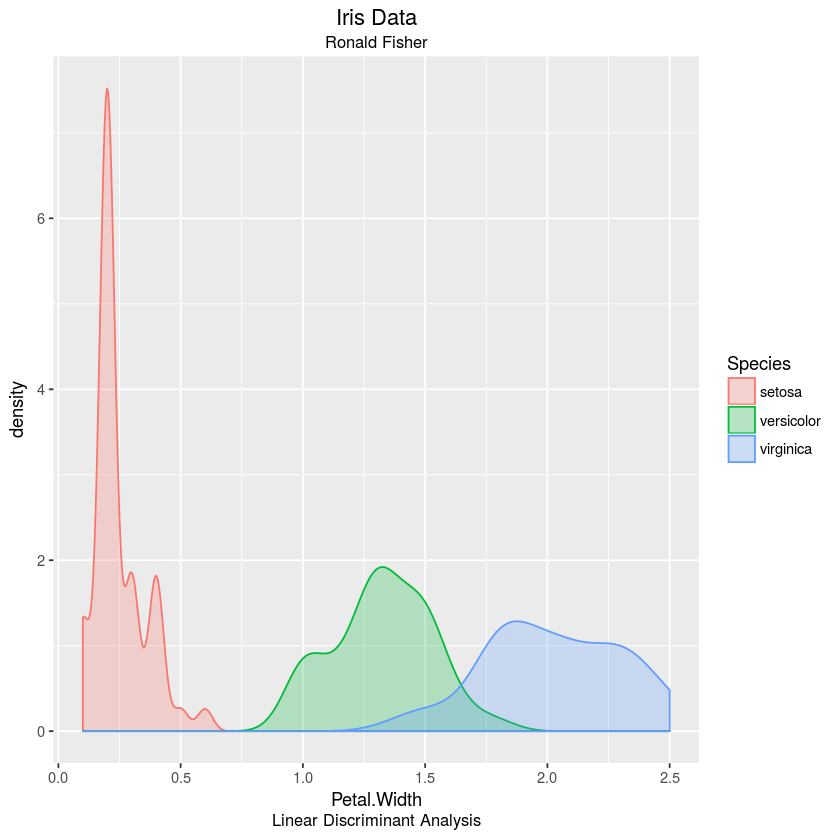

In [2]:
# Podemos hacer el gráfico en más de un paso agregando elementos o formato

# Guardamos el gráfico en p, alpha es la transparencia
p <- ggplot(iris, aes(Petal.Width, colour=Species, fill=Species)) + geom_density(alpha = 0.25)

# Agregamos elementos a p y reescribimos
p <- p + labs(title="Iris Data", subtitle="Ronald Fisher", caption="Linear Discriminant Analysis")

# centramos los titulos y caption
p + theme(
        plot.title = element_text(hjust = 0.5), 
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5)
         )

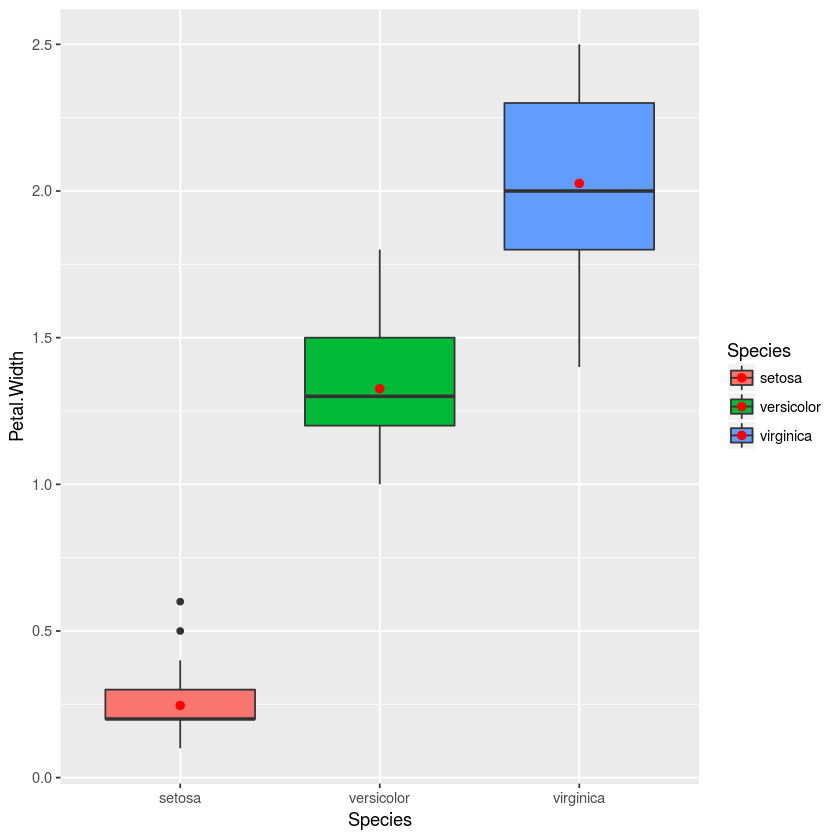

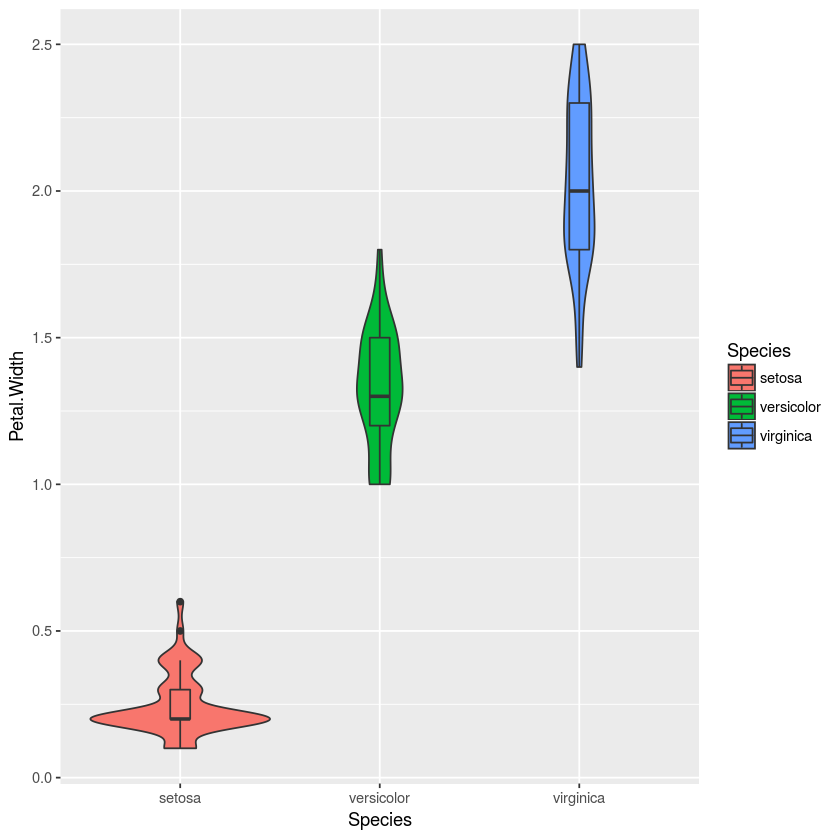

In [3]:
# Guardamos boxplot
p <- ggplot(iris, aes(x=Species, y=Petal.Width, fill=Species)) + geom_boxplot()

# Agregamos la media como un punto rojo usando stat_summary
p + stat_summary(fun.y=mean, geom="point", size=2, color="red")

# Diagramas de violín
ggplot(iris, aes(x=Species, y=Petal.Width, fill=Species)) + geom_violin() + geom_boxplot(width=0.1)

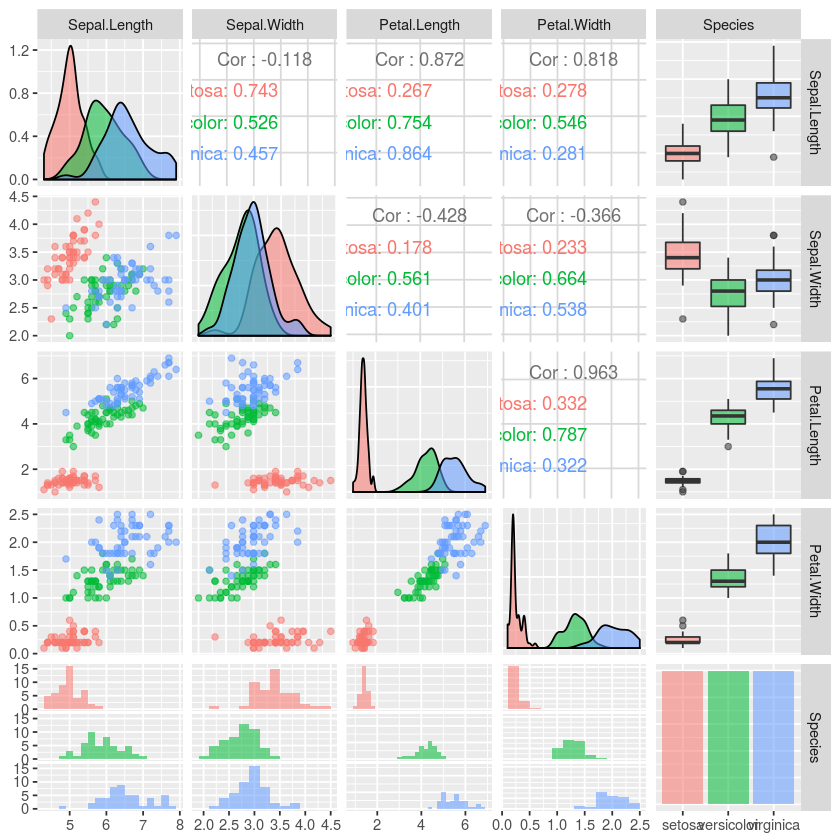

In [4]:
# install.packages("GGally")
# Replicar la matriz de gráficos de dispersión puede requerir modificar/crear
# la función necesaria

# Usamos ggpairs para el conjunto iris
library(GGally)
ggpairs(iris, aes(colour = Species, alpha = 0.4), lower = list(combo = wrap("facethist", binwidth = 0.2)))

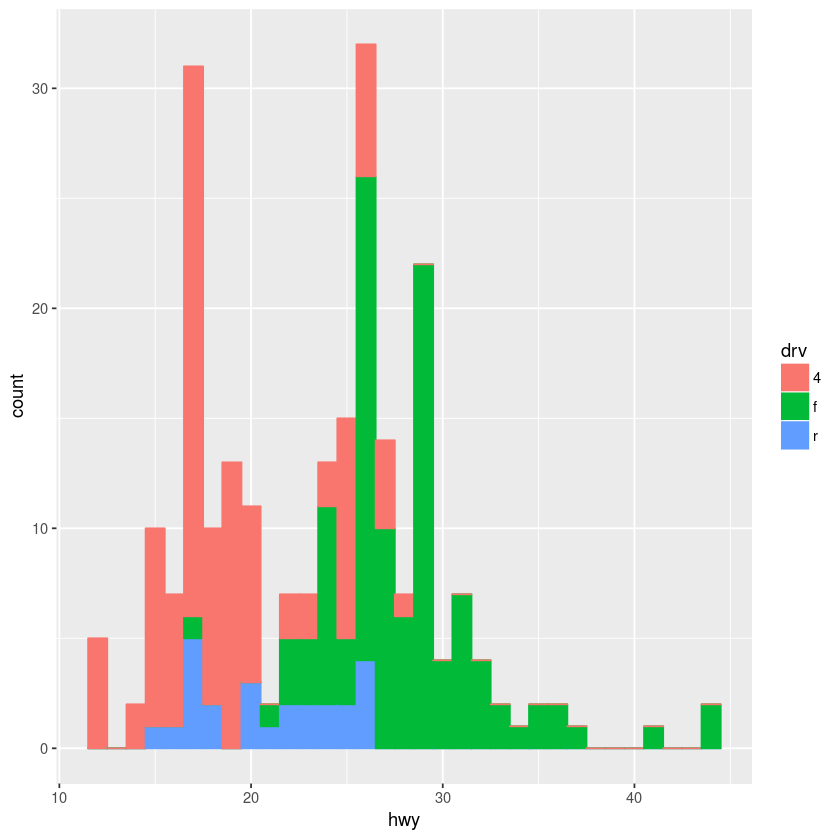

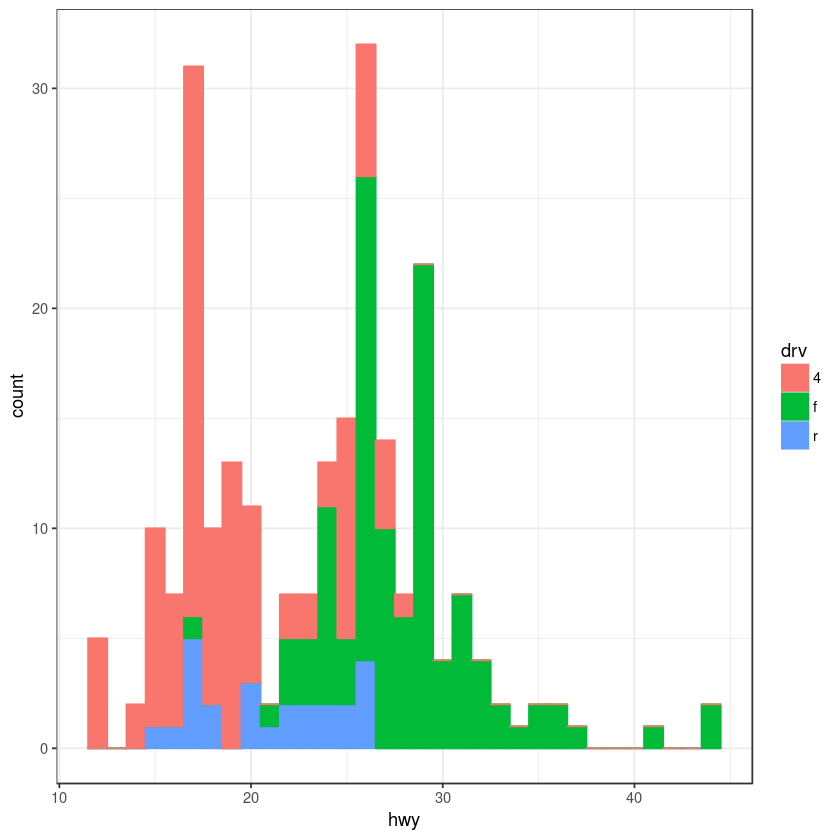

In [5]:
# Exploraremos el conjunto de datos mpg
# http://ggplot2.tidyverse.org/reference/mpg.html

library(ggplot2)

# Ejemplo:
# data: mpg, usar head(mpg), str(mpg) para ver la estructura de mpg
# aes(x=hwy), datos para x hwy de mpg
# Se define el color y relleno con la variable drv
# geom_histogram(binwidth=1), define un histograma con ancho de bin = 1
ggplot(mpg, aes(hwy, colour=drv, fill=drv)) + geom_histogram(binwidth=1)

# Quitar el fondo: theme_bw()
# Guardamos nuestro gráfico en myplot y agregamos el tema theme_bw
# Ver: http://ggplot2.tidyverse.org/reference/ggtheme.html
myplot <- ggplot(mpg, aes(hwy, colour=drv, fill=drv)) + geom_histogram(binwidth=1)
myplot + theme_bw()

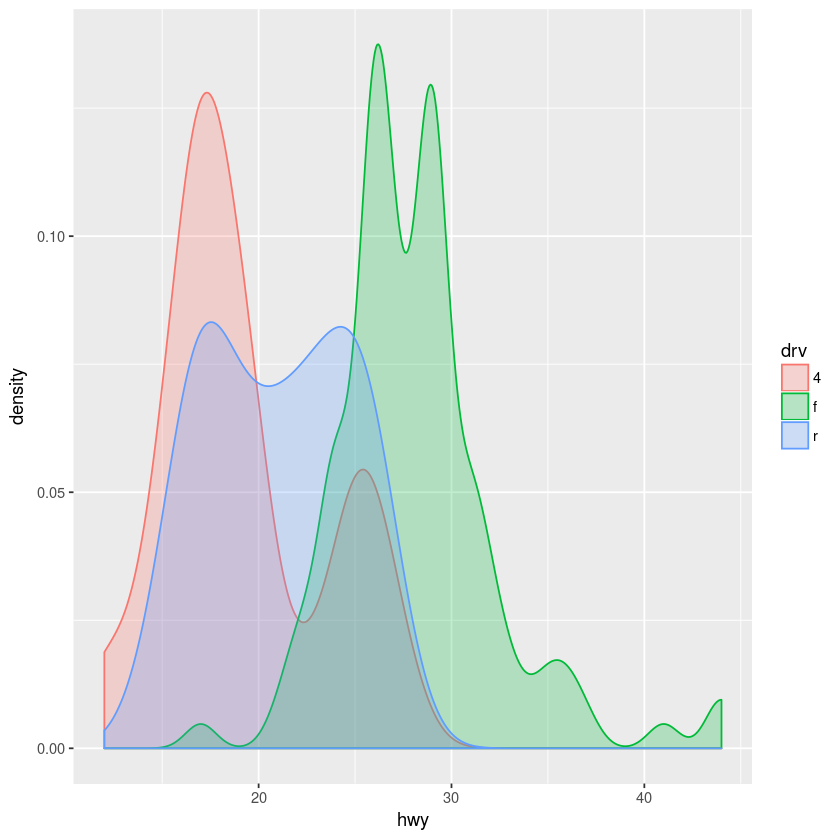

In [6]:
# Example of a density plot
ggplot(mpg, aes(hwy, colour=drv, fill=drv)) + geom_density(alpha = 0.25)

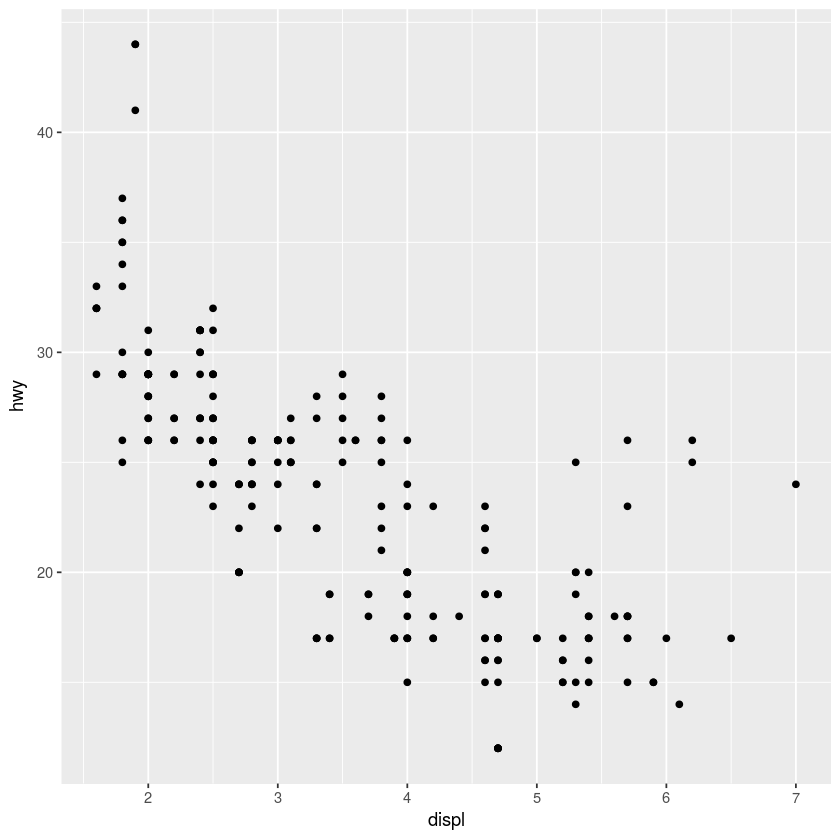

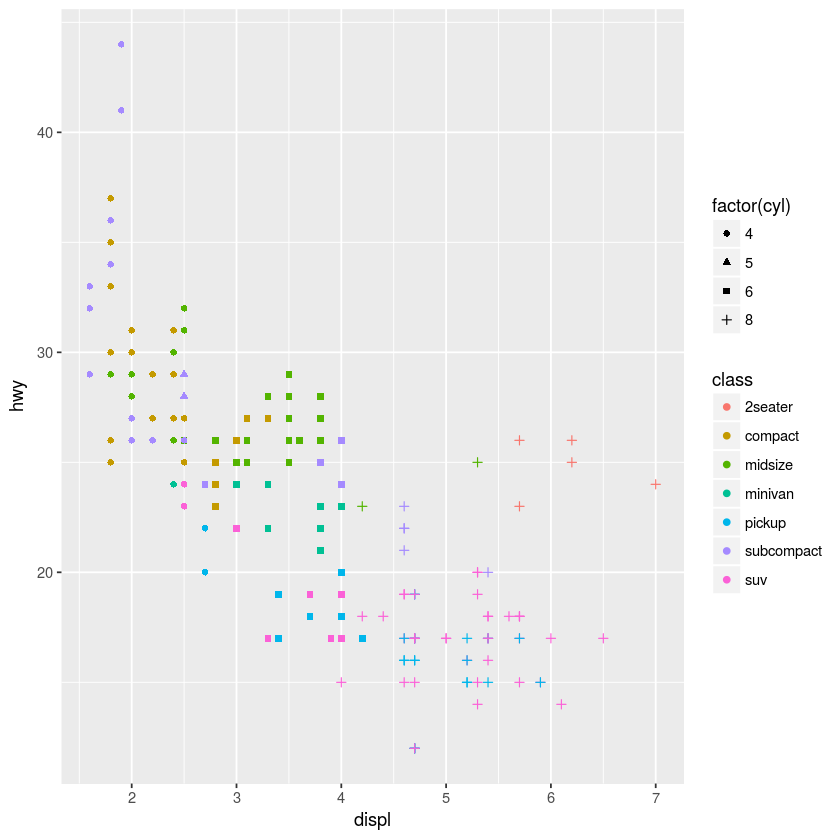

In [7]:
p <- ggplot(mpg, aes(x = displ, y = hwy)) 
p + geom_point()
# Podemos modificar el gráfico almacenado en p 
# Especificando el color y forma a partir de otra variable
p + geom_point(aes(color=class, shape = factor(cyl)))

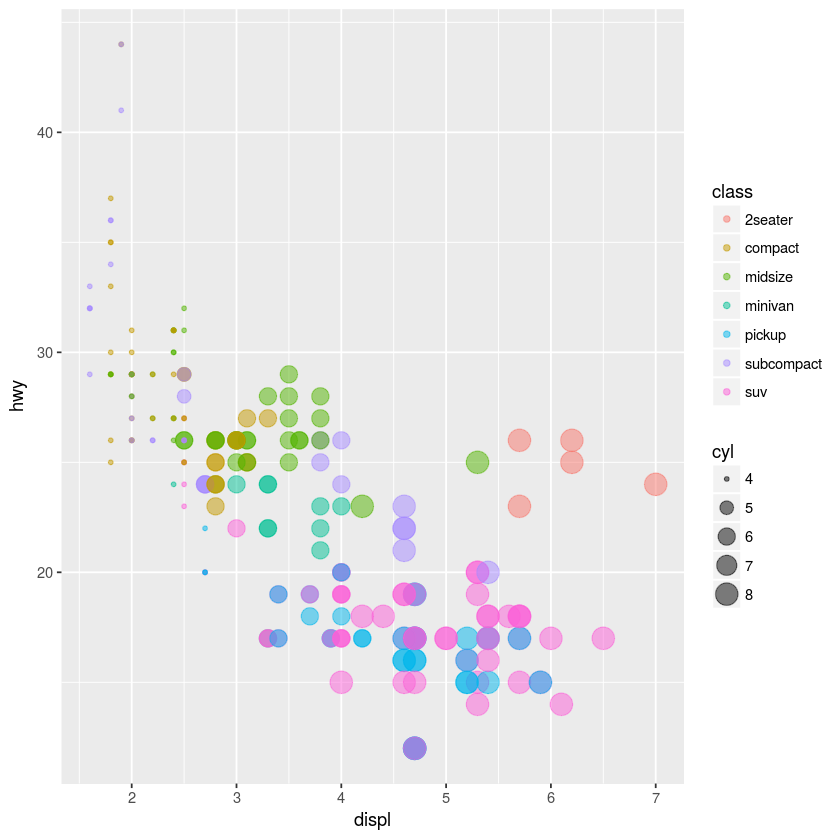

In [8]:
# Otra modificación a p
# Podemos tambien indicar el tamaño del símbolo y su transparencia
p + geom_point(aes(color=class, size=cyl), alpha=0.5)

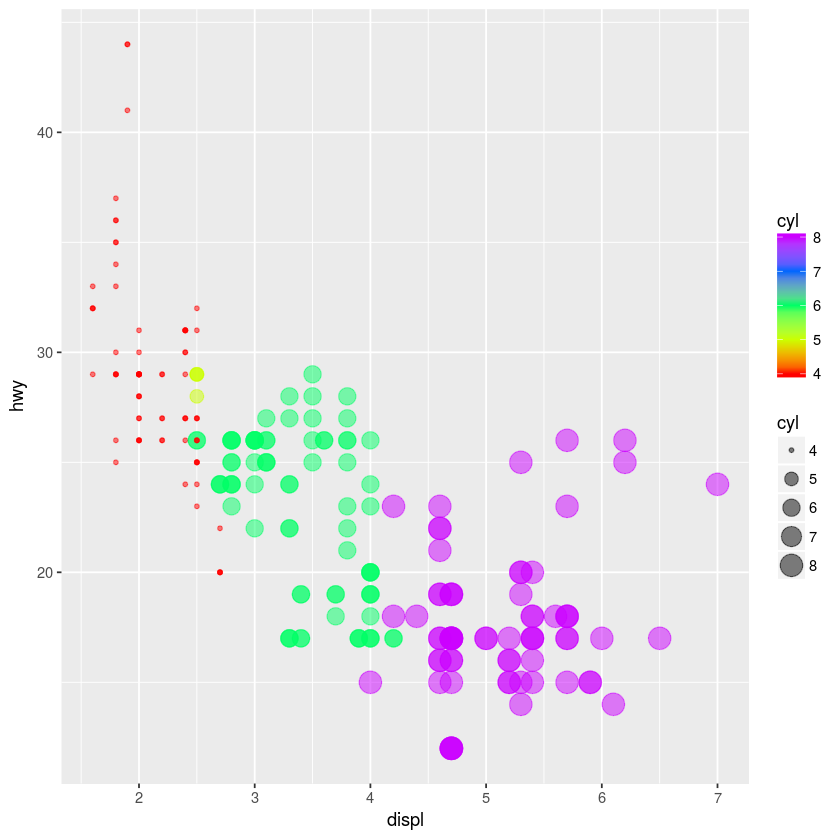

In [9]:
# Podemos definir una escala de colores continua
# En este ejemplo en particular no se aprecia de la mejor manera dado que cyl es discreto
p + geom_point(aes(color=cyl, size=cyl), alpha=0.5) + scale_colour_gradientn(colours = rainbow(5))

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


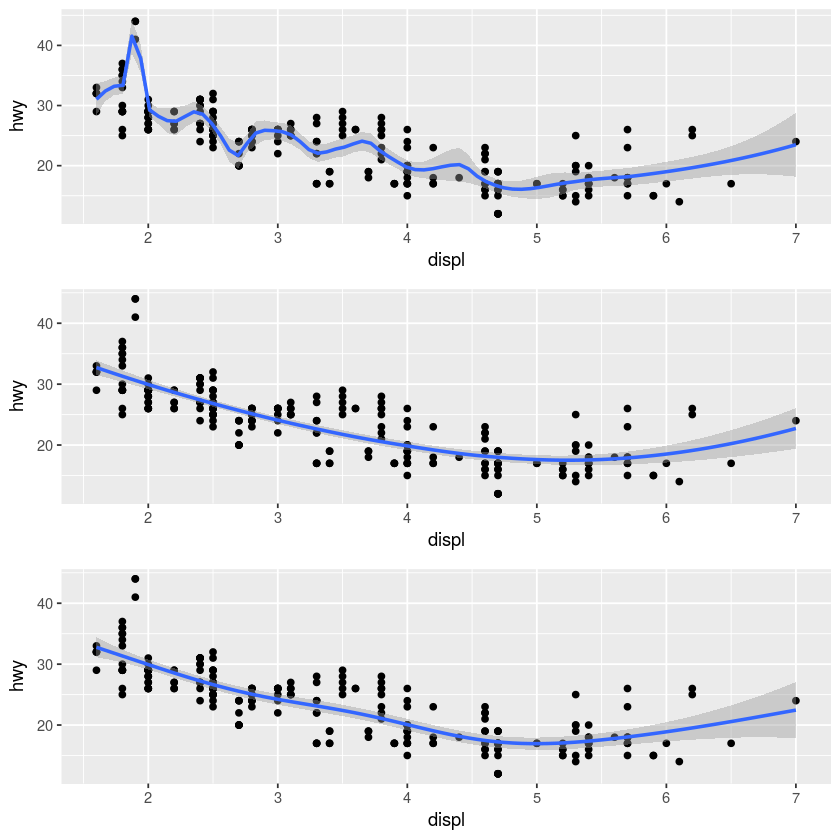

In [10]:
# Capas

# A la capa geom_point() agregamos una curva suavizada
# geom_smooth(span = 0.2)
# span controla el suavizado 
# para n de puntos pequeño funciona bien

p <- list()
p[[1]] <- ggplot(mpg, aes(displ, hwy)) + geom_point() + geom_smooth(span = 0.2)

p[[2]] <- ggplot(mpg, aes(displ, hwy)) + geom_point() + geom_smooth(span = 1)

# Para un número grande n de puntos es mas eficiente el metodo gam
library(mgcv)
p[[3]] <- ggplot(mpg, aes(displ, hwy)) + geom_point() + geom_smooth(method = "gam", formula = y ~ s(x))

# Cargamos la función multiplot
source("https://raw.githubusercontent.com/marsgr6/r-scripts/master/scripts/multiplot.R")

multiplot(plotlist=p)

# Ver:
# http://www.itl.nist.gov/div898/handbook/pmd/section1/pmd144.htm
# http://www.itl.nist.gov/div898/handbook/pmd/section1/dep/dep144.htm

# Un ejemplo más simple:

# g <- ggplot(iris, aes(x=Petal.Width, y=Petal.Length, colour=Species))
# g + geom_point() + geom_smooth(method=lm, se=F)

# Los parámetros anteriores hacen referencia a
# method: lm -> linear model
# se: intervalos de confianza para la curva

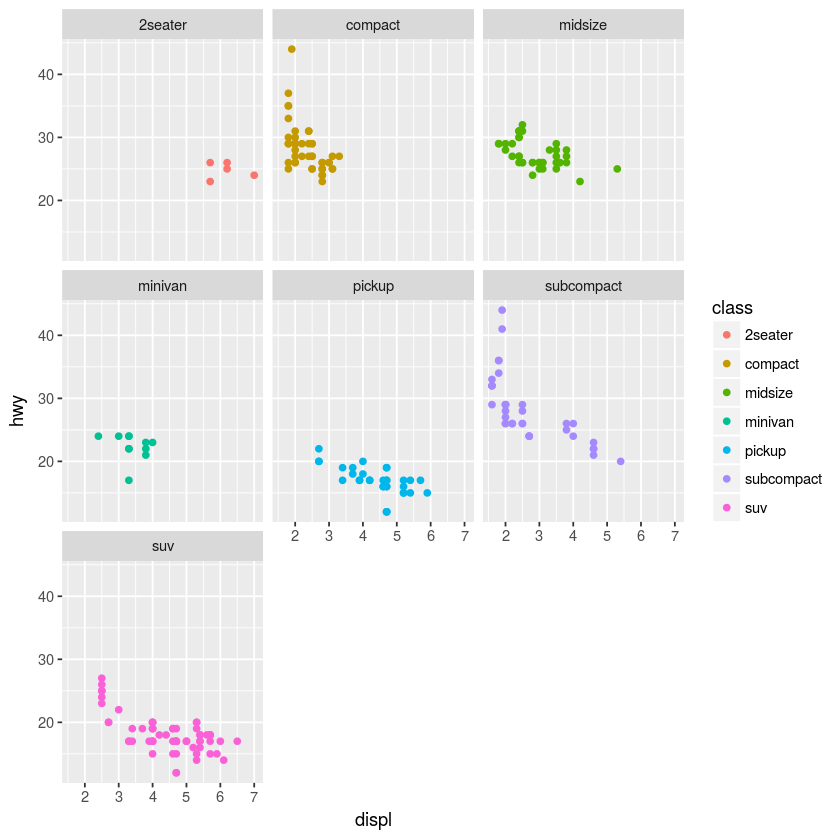

In [11]:
# Facetting
#   Facetting crea tablas de gráficos dividiendo los datos en
#   subconjuntos y mostrando el mismo gráfico para cada subconjuto.
#   Hay dos tipos de  facetting: grid y wrapped.
#   Ejemplo: 
#     g <- ggplot(mpg, aes(displ, hwy))
#     g + geom_point(alpha=1/3) + facet_grid(cyl~class) # Presenta un grid de 7x4 incluso si no hay valores
#     g + geom_point(alpha=1/3) + facet_wrap(cyl~class) # Presenta solo los paneles que contienen valores
#
ggplot(mpg, aes(displ, hwy, colour=class)) + geom_point() + facet_wrap(~class)

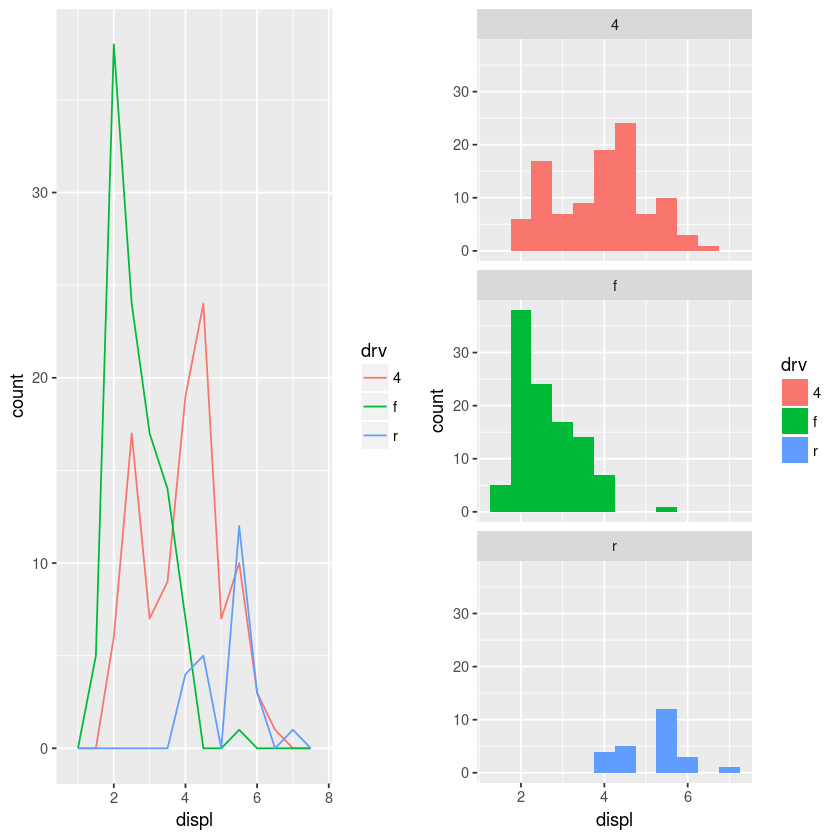

In [12]:
# Para comparar las distribuciones de diferentes subgrupos, 
# podemos asignar una variable categórica a fill (para geom_histogram ()) 
# o color (para geom_freqpoly ()). 
# Es más fácil comparar distribuciones usando polígonos de frecuencias 
# porque la tarea de interpretación es más fácil. 
# También puede utilizar facetting: esto hace las comparaciones un poco 
# más difícil, pero es más fácil ver la distribución de cada grupo.

p <- list()
p[[1]] <- ggplot(mpg, aes(displ, colour = drv)) + geom_freqpoly(binwidth = 0.5)

p[[2]] <- ggplot(mpg, aes(displ, fill = drv)) + geom_histogram(binwidth = 0.5) +
    facet_wrap(~drv, ncol = 1)

# Definir la función multiplot (ver al final de este notebook)
multiplot(plotlist=p, cols=2)

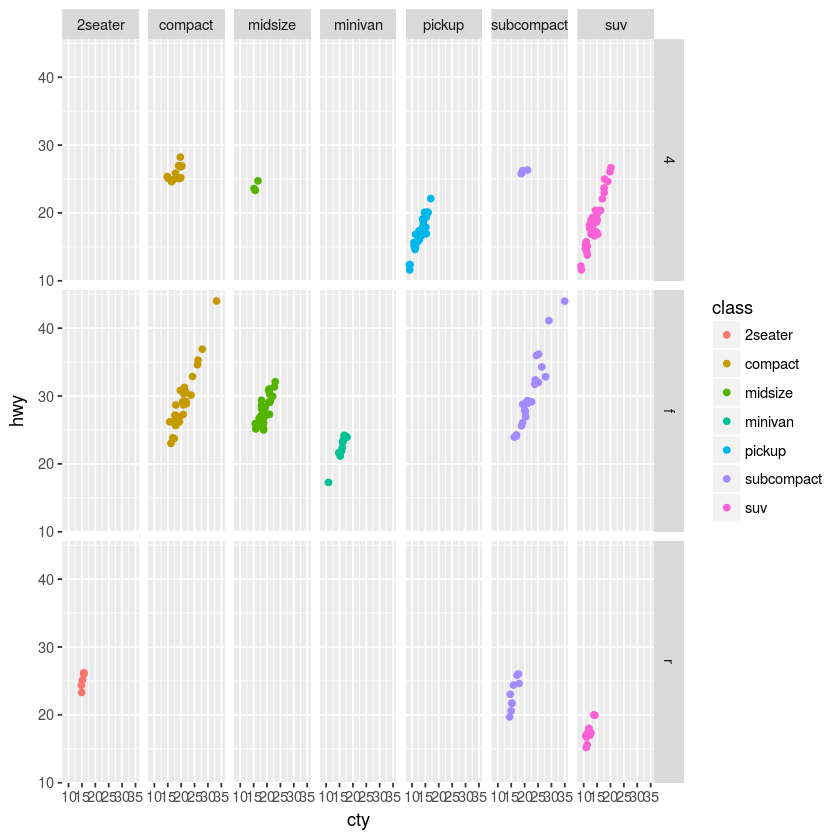

In [13]:
# Más ejemplos de facetting

g2 <- ggplot(mpg, aes(cty, hwy, colour=class)) + geom_jitter()
# g2 + facet_grid(. ~ fl)
# g2 + facet_grid(year ~ .)
g2 + facet_grid(drv ~ class)
# g2 + facet_wrap( ~ fl)

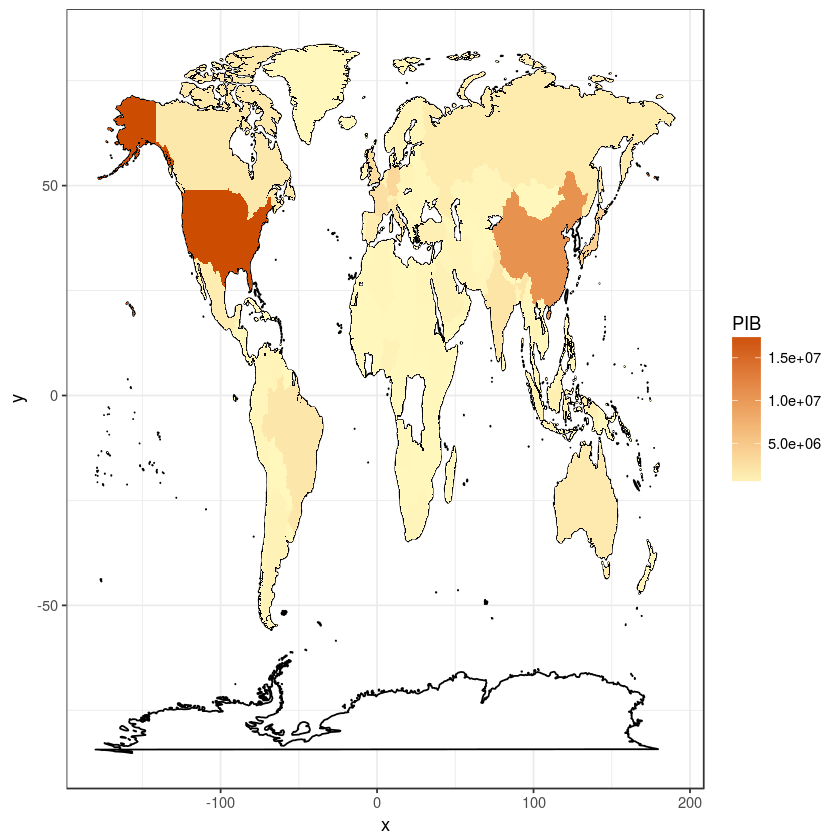

In [14]:
# Mapas con ggplot2

# Mapa GDP mundial

# Descargar archivo GDP.csv de: 
# https://drive.google.com/open?id=0B-dmEvN59Z2ZZkdvSHp0dGd6Y1k

gdp <- read.csv("GDP.csv") # Cargar datos 
# head(gdp)

# Convierte los datos del paquete 'mapas' 
# en un dataframe adecuado para graficar con ggplot2.
wm <- map_data("world") 

# Esta estructura es familar
# pasamos los datos gdp
# en la estética aes especificamos como id del 
# mapa la columna PAIS de gdp
gg <- ggplot(gdp, aes(map_id = PAIS))

# agregamos capas geom_map()
# Una primera capa general pintando del mapa
# por defecto con relleno blanco y borde negro
# podemos cambiar fill por otro color
# si no hubieran datos asociados para el map_id (PAIS)
# el color por defecto asignado se mantendrá.
gg <- gg + geom_map(dat=wm, map = wm, 
    aes(map_id=region), fill="white", color="black")

# agregamos una capa adicional geom_map 
# esta vez en la estética especificamos para el relleno
# fill = PIB de los datos gdp
# expand limits asegura que todos los elementos del mapa
# tengan la misma escala
# en scale fill gradient podemos especificar 
# un color para el valor mínimo en los datos y
# un valor para el máximo
# Y una escala continua de colores para los valores (PIB)
gg + geom_map(aes(fill = PIB), map = wm) + 
    expand_limits(x = wm$long, y = wm$lat) + 
    scale_fill_gradient(low="#fff7bc", high="#cc4c02", name="PIB") + theme_bw()

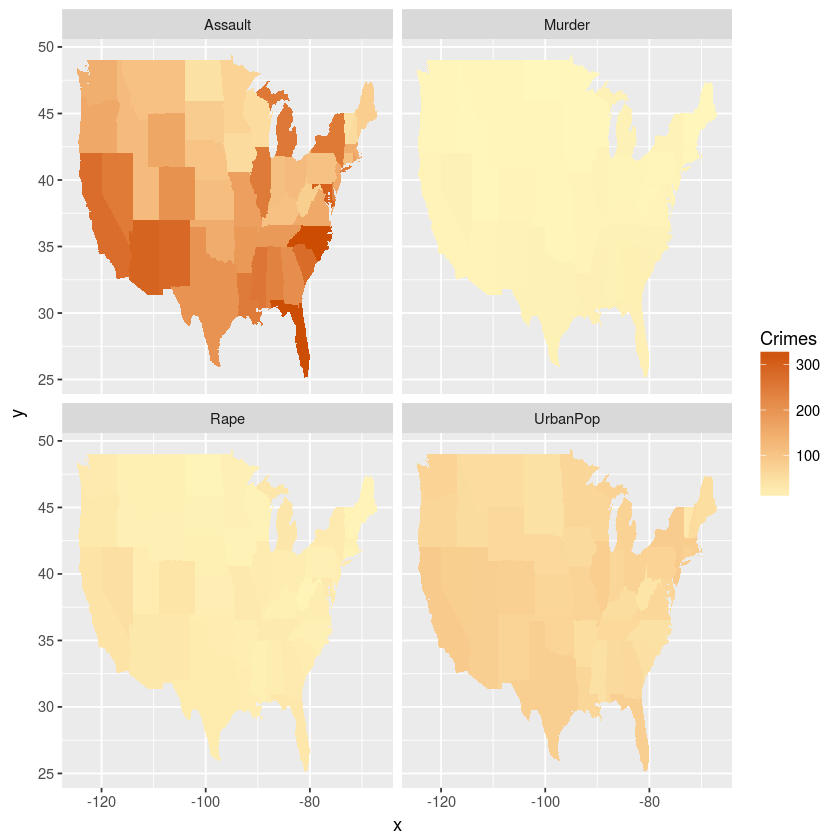

In [15]:
# Combinando mapas usando facet

# Descargar archvo crm.csv de:
# https://drive.google.com/file/d/0B-dmEvN59Z2ZR3Z1STNLZmZkc0E/view?usp=sharing

# Mapa Crime USA
crm <- read.csv("crm.csv")
# head(crm)

states_map <- map_data("state")

gg <- ggplot(crm, aes(map_id = state))

gg + geom_map(aes(fill = value), map = states_map) +
    expand_limits(x = states_map$long, y = states_map$lat) +
    scale_fill_gradient(low="#fff7bc", high="#cc4c02", name="Crimes") + 
    facet_wrap( ~ variable)

### Visualización en 3D
- https://rpubs.com/aagarwal29/179912
- http://www.statmethods.net/graphs/scatterplot.html
- https://plot.ly/r/

**- Más acerca de mapas en ggplot2**
 - http://eriqande.github.io/rep-res-web/lectures/making-maps-with-R.html